In [2]:
import numpy as np
import pandas as pd
from keras import layers
from keras.layers import Input, Dense, Dropout, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
from keras.callbacks import ModelCheckpoint
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import glob
import cv2

In [3]:
train_path = '/home/furkan/Documents/Fire-vs-NoFire/Training/'
test_path = '/home/furkan/Documents/Fire-vs-NoFire/Test/'

In [4]:
train_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(train_path, batch_size=16, class_mode='binary', subset='training')

validation_generator = train_datagen.flow_from_directory(train_path, batch_size=16, class_mode='binary', subset='validation')

Found 31501 images belonging to 2 classes.
Found 7874 images belonging to 2 classes.


In [5]:
print(train_generator.class_indices)
print(validation_generator.class_indices)

{'Fire': 0, 'No_Fire': 1}
{'Fire': 0, 'No_Fire': 1}


In [6]:
train_steps = train_generator.n // train_generator.batch_size
valid_steps = validation_generator.n // validation_generator.batch_size

In [7]:
train_generator.image_shape

(256, 256, 3)

In [8]:
train_image_names = glob.glob('/home/furkan/Documents/Fire-vs-NoFire/Training/*/*.jpg')
train_Fire_image_names = glob.glob('/home/furkan/Documents/Fire-vs-NoFire/Training/Fire/*.jpg')
train_noFire_image_names = glob.glob('/home/furkan/Documents/Fire-vs-NoFire/Training/No_Fire/*.jpg')

print("Total number of training images: ", len(train_image_names))
print("number of Fire images: ", len(train_Fire_image_names))
print("number of No Fire images: ", len(train_noFire_image_names))

Total number of training images:  39375
number of Fire images:  25018
number of No Fire images:  14357


In [9]:
test_image_names = glob.glob('/home/furkan/Documents/Fire-vs-NoFire/Test/*/*.jpg')
test_Fire_image_names = glob.glob('/home/furkan/Documents/Fire-vs-NoFire/Test/Fire/*.jpg')
test_noFire_image_names = glob.glob('/home/furkan/Documents/Fire-vs-NoFire/Test/No_Fire/*.jpg')

print("Total number of test images: ", len(test_image_names))
print("number of Fire images: ", len(test_Fire_image_names))
print("number of No Fire images: ", len(test_noFire_image_names))

Total number of test images:  8617
number of Fire images:  5137
number of No Fire images:  3480


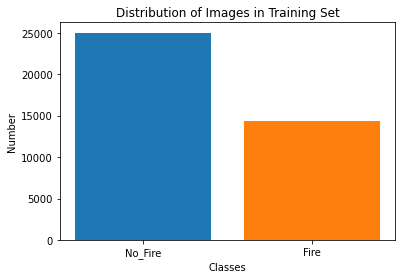

In [10]:
plt.bar(os.listdir('/home/furkan/Documents/Fire-vs-NoFire/Training/')[0], len(train_Fire_image_names))
plt.bar(os.listdir('/home/furkan/Documents/Fire-vs-NoFire/Training/')[1], len(train_noFire_image_names))
plt.xlabel("Classes")
plt.ylabel("Number")
plt.title("Distribution of Images in Training Set")
plt.show()

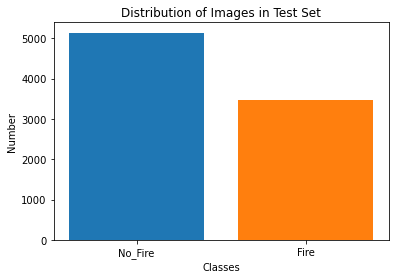

In [11]:
plt.bar(os.listdir('/home/furkan/Documents/Fire-vs-NoFire/Test/')[0], len(test_Fire_image_names))
plt.bar(os.listdir('/home/furkan/Documents/Fire-vs-NoFire/Test/')[1], len(test_noFire_image_names))
plt.xlabel("Classes")
plt.ylabel("Number")
plt.title("Distribution of Images in Test Set")
plt.show()

In [12]:
type(train_datagen)

tensorflow.python.keras.preprocessing.image.ImageDataGenerator

In [13]:
print("Batch Size for Input Image : ",train_generator[0][0].shape)
print("Batch Size for Output Image : ",train_generator[0][1].shape)
print("Image Size of first image : ",train_generator[0][0][0].shape)

Batch Size for Input Image :  (16, 256, 256, 3)
Batch Size for Output Image :  (16,)
Image Size of first image :  (256, 256, 3)


{'Fire': 0, 'No_Fire': 1}
{'Fire': 0, 'No_Fire': 1}


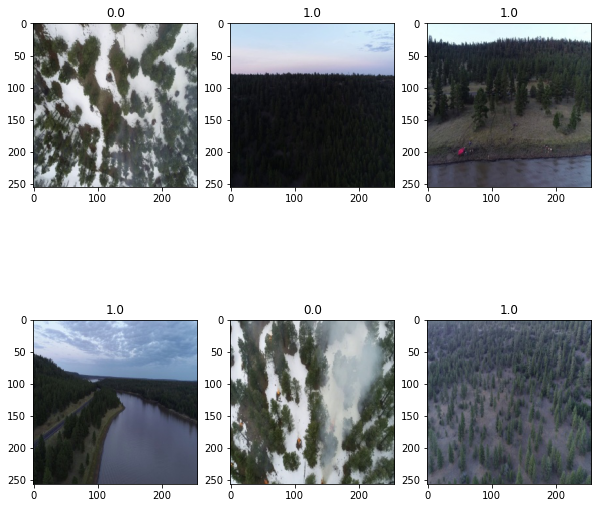

In [14]:
fig , axs = plt.subplots(2,3 ,figsize = (10,10))
axs[0][0].imshow(train_generator[0][0][12])
axs[0][0].set_title(train_generator[0][1][12])
axs[0][1].imshow(train_generator[0][0][1])
axs[0][1].set_title(train_generator[0][1][1])
axs[0][2].imshow(train_generator[0][0][14])
axs[0][2].set_title(train_generator[0][1][14])
axs[1][0].imshow(train_generator[0][0][15])
axs[1][0].set_title(train_generator[0][1][15])
axs[1][1].imshow(train_generator[0][0][13])
axs[1][1].set_title(train_generator[0][1][13])
axs[1][2].imshow(train_generator[0][0][3])
axs[1][2].set_title(train_generator[0][1][3])

#Title of 0.0 refers to Fire
#1.0 refers to NoFire
print(train_generator.class_indices)
print(validation_generator.class_indices)

In [19]:
checkpointer = ModelCheckpoint(filepath='/home/furkan/Documents/weights.hdf5', verbose=1, save_best_only=True)

In [27]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.50))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 85, 85, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 42, 64)        0

In [33]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

In [20]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=train_steps,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=valid_steps,
        verbose=True,
        shuffle=True,
        callbacks=[checkpointer])

/home/furkan/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1968/1968 [==============================] - 3759s 2s/step - loss: 0.1935 - binary_accuracy: 0.9237 - val_loss: 1.0116 - val_binary_accuracy: 0.8511

Epoch 00001: val_loss improved from inf to 1.01158, saving model to /home/furkan/Documents/weights.hdf5
Epoch 2/10
1968/1968 [==============================] - 3695s 2s/step - loss: 0.0362 - binary_accuracy: 0.9906 - val_loss: 0.6352 - val_binary_accuracy: 0.9491

Epoch 00002: val_loss improved from 1.01158 to 0.63520, saving model to /home/furkan/Documents/weights.hdf5
Epoch 3/10
1968/1968 [==============================] - 3684s 2s/step - loss: 0.0233 - binary_accuracy: 0.9937 - val_loss: 0.4992 - val_binary_accuracy: 0.9320

Epoch 00003: val_loss improved from 0.63520 to 0.49917, saving model to /home/furkan/Documents/weights.hdf5
Epoch 4/10
1968/1968 [==============================] - 3675s 2s/step - loss: 0.0146 - binary_accuracy: 0.9961 - val_loss: 0.0776 - val_binary_accuracy: 0.9873

Epoch 00004: val_loss improved from 

In [21]:
model.save('/home/furkan/Documents/main.hdf5')

In [ ]:
model.load_weights('C:\\Users\\hfsul\\Documents\\CE888 Assignment\\weights.hdf5')

In [ ]:
#checkpointer = ModelCheckpoint(filepath='C:\\Users\\hfsul\\Documents\\CE888 Assignment\\weights.hdf5', verbose=1, save_best_only=True)

# Metrics(Accuracy) and plots(training/validation accuracy and loss)

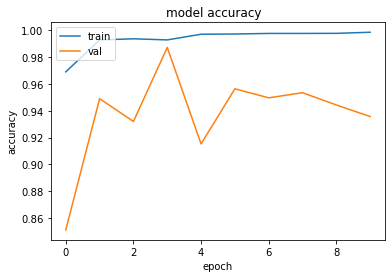

In [29]:
# summarize history for accuracy
plt.plot(history.history['binary_accuracy'] )
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy  ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

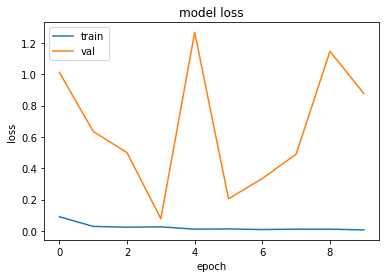

In [30]:
# summarize history for loss
plt.plot(history.history['loss'] )
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Predictions

In [31]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_path,
        batch_size=16,
        class_mode='binary')

test_steps = test_generator.n // test_generator.batch_size

Found 8617 images belonging to 2 classes.


In [34]:
model.evaluate_generator(test_generator, verbose=1, steps=test_steps)

538/538 [==============================] - 172s 319ms/step - loss: 0.6933 - binary_accuracy: 0.4859


[0.6933030486106873, 0.48652416467666626]

In [35]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [42]:
predictions = model.predict_generator(test_generator, verbose=1)

/home/furkan/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


539/539 [==============================] - 169s 313ms/step


In [43]:
from sklearn.metrics import confusion_matrix


test_labels = test_generator.classes


cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

Confusion matrix, without normalization
[[5137    0]
 [3480    0]]


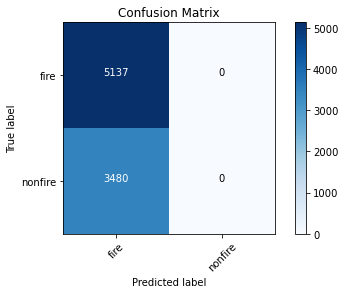

In [45]:
import itertools
cm_plot_labels = ['fire','nonfire']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')